In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv("../Resources/telecom_customer_churn.csv")
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [3]:
fig7 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Total Charges", size="Age", animation_frame="Tenure in Months",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig7.show()

In [44]:
with open('img\scatter_mapbox.html', 'a') as f:
    f.write(fig7.to_html(full_html=False, include_plotlyjs='cdn'))

In [4]:
df = df[df['Customer Status'] != 'Joined']
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7037  9986-BONCE  Female   36      No                     0     Fallbrook   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7037     92028  33.362575 -117.299644                    0  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7037  Bank Withdrawal          20.95         85.50           0.00   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7037                        0                        8.04         93.54   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7037          Churned       Competitor   

In [5]:
df['Churn Category'] = df['Churn Category'].replace(np.nan,'satisfied')
df['Internet Type'] = df['Internet Type'].replace(np.nan,'No')
df['Multiple Lines'] = df['Multiple Lines'].replace(np.nan,'No')
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].replace(np.nan,0)
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].replace(np.nan,0)
df['Multiple Lines']=df['Multiple Lines'].replace(np.nan,'No')
df['Internet Service']= df['Internet Service'].replace(np.nan,'No')
df['Online Security']= df['Online Security'].replace(np.nan,'No')
df['Online Backup']= df['Online Backup'].replace(np.nan,'No')
df['Device Protection Plan']= df['Device Protection Plan'].replace(np.nan,'No')
df['Premium Tech Support']= df['Premium Tech Support'].replace(np.nan,'No')
df['Streaming TV']= df['Streaming TV'].replace(np.nan,'No')
df['Streaming Music']= df['Streaming Music'].replace(np.nan,'No')
df['Unlimited Data']= df['Unlimited Data'].replace(np.nan,'No')
df['Streaming Movies']= df['Streaming Movies'].replace(np.nan,'No')

In [6]:
df = df.drop(['Churn Reason','Customer ID','City','Total Refunds','Zip Code','Latitude','Longitude','Paperless Billing','Total Extra Data Charges','Total Revenue'],axis=1)
df.head()

Gender  Age Married  Number of Dependents  Number of Referrals  \
0  Female   37     Yes                     0                    2   
1    Male   46      No                     0                    0   
2    Male   50      No                     0                    0   
3    Male   78     Yes                     0                    1   
4  Female   75     Yes                     0                    3   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 9     None           Yes                              42.39   
1                 9     None           Yes                              10.69   
2                 4  Offer E           Yes                              33.65   
3                13  Offer D           Yes                              27.82   
4                 3     None           Yes                               7.38   

  Multiple Lines  ... Streaming Movies Streaming Music  Unlimited Data  \
0             No  ...               No              No             Yes   
1            Yes  ...              Yes             Yes              No   
2             No  ...               No              No             Yes   
3             No  ...              Yes              No             Yes   
4             No  ...               No              No             Yes   

         Contract   Payment Method Monthly Charge Total Charges  \
0        One Year      Credit Card           65.6        593.30   
1  Month-to-Month      Credit Card           -4.0        542.40   
2  Month-to-Month  Bank Withdrawal           73.9        280.85   
3  Month-to-Month  Bank Withdrawal           98.0       1237.85   
4  Month-to-Month      Credit Card           83.9        267.40   

  Total Long Distance Charges Customer Status   Churn Category  
0                      381.51          Stayed        satisfied  
1                       96.21          Stayed        satisfied  
2                      134.60         Churned       Competitor  
3                      361.66         Churned  Dissatisfaction  
4                       22.14         Churned  Dissatisfaction  

[5 rows x 28 columns]

In [7]:
fig = px.histogram(df, x='Total Charges')
fig

In [8]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')
fig1 = px.histogram(df, x="Total Charges", color="Gender", marginal="rug", hover_data=df_object.columns)
fig1.show()

In [9]:

bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)
fig4 =px.box(df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', color ='Customer Status')
fig4

<ipython-input-9-bce7ba96c227>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
fig5 =px.box(df_object.join(df_num),x='AgeRange',y='Tenure in Months', color ='Customer Status')
fig5

In [11]:
fig6 =px.box(df_object.join(df_num),x='Gender',y='Tenure in Months', color ='Customer Status')
fig6

In [12]:
fig8 = px.scatter_matrix(df, dimensions=["Age", "Total Charges", "Tenure in Months","Avg Monthly Long Distance Charges"], color="Customer Status",width=1200, height=1200)
fig8.show()

In [13]:
def foo(x):
    if x == 'Stayed':
        return 0
    elif x == 'Churned':
        return 1
    else:
        return x
df['Customer Status']=df['Customer Status'].apply(lambda x : foo(x))
df

Gender  Age Married  Number of Dependents  Number of Referrals  \
0     Female   37     Yes                     0                    2   
1       Male   46      No                     0                    0   
2       Male   50      No                     0                    0   
3       Male   78     Yes                     0                    1   
4     Female   75     Yes                     0                    3   
...      ...  ...     ...                   ...                  ...   
7037  Female   36      No                     0                    0   
7038  Female   20      No                     0                    0   
7039    Male   40     Yes                     0                    1   
7041    Male   21     Yes                     0                    5   
7042    Male   36     Yes                     0                    1   

      Tenure in Months    Offer Phone Service  \
0                    9     None           Yes   
1                    9     None           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3     None           Yes   
...                ...      ...           ...   
7037                 4     None           Yes   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7041                67  Offer A           Yes   
7042                63     None            No   

      Avg Monthly Long Distance Charges Multiple Lines  ... Streaming Movies  \
0                                 42.39             No  ...               No   
1                                 10.69            Yes  ...              Yes   
2                                 33.65             No  ...               No   
3                                 27.82             No  ...              Yes   
4                                  7.38             No  ...               No   
...                                 ...            ...  ...              ...   
7037                               2.01             No  ...               No   
7038                              46.68             No  ...               No   
7039                              16.20            Yes  ...              Yes   
7041                               2.12             No  ...              Yes   
7042                               0.00             No  ...              Yes   

     Streaming Music  Unlimited Data        Contract   Payment Method  \
0                 No             Yes        One Year      Credit Card   
1                Yes              No  Month-to-Month      Credit Card   
2                 No             Yes  Month-to-Month  Bank Withdrawal   
3                 No             Yes  Month-to-Month  Bank Withdrawal   
4                 No             Yes  Month-to-Month      Credit Card   
...              ...             ...             ...              ...   
7037              No              No  Month-to-Month  Bank Withdrawal   
7038             Yes             Yes        One Year      Credit Card   
7039             Yes             Yes  Month-to-Month  Bank Withdrawal   
7041             Yes             Yes        Two Year      Credit Card   
7042             Yes             Yes        Two Year  Bank Withdrawal   

     Monthly Charge Total Charges Total Long Distance Charges Customer Status  \
0             65.60        593.30                      381.51               0   
1             -4.00        542.40                       96.21               0   
2             73.90        280.85                      134.60               1   
3             98.00       1237.85                      361.66               1   
4             83.90        267.40                       22.14               1   
...             ...           ...                         ...             ...   
7037          20.95         85.50                        8.04               1   
7038          55.15        742.90                      606.84     

<AxesSubplot:>

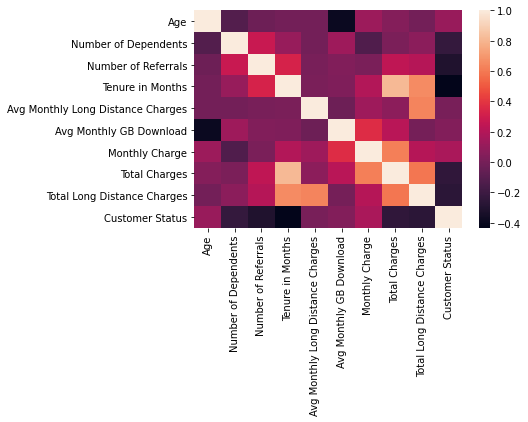

In [14]:
corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [15]:
df.nunique()

Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3452
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Payment Method                          3
Monthly Charge                    

In [16]:
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Long Distance Charg

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number of Dependents               6589 non-null   int64  
 4   Number of Referrals                6589 non-null   int64  
 5   Tenure in Months                   6589 non-null   int64  
 6   Offer                              6589 non-null   object 
 7   Phone Service                      6589 non-null   object 
 8   Avg Monthly Long Distance Charges  6589 non-null   float64
 9   Multiple Lines                     6589 non-null   object 
 10  Internet Service                   6589 non-null   object 
 11  Internet Type                      6589 non-null   objec

In [18]:
print(df['Customer Status'].value_counts())
100. * df['Customer Status'].value_counts() / len(df['Customer Status'])


0    4720
1    1869
Name: Customer Status, dtype: int64


0    71.634542
1    28.365458
Name: Customer Status, dtype: float64

<AxesSubplot:>

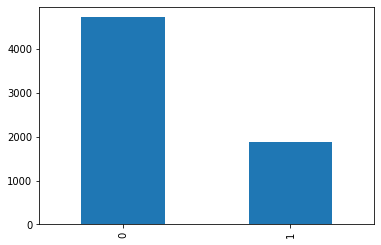

In [19]:
df['Customer Status'].value_counts().plot(kind='bar')

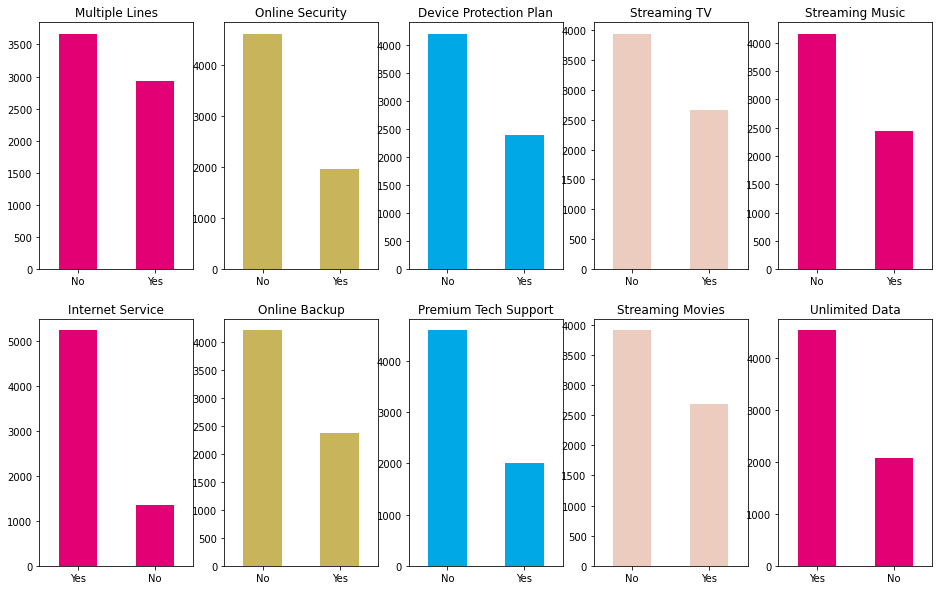

In [20]:
#SUBPLOTS FOR SERVICE DATA

service_labels = ['Multiple Lines', 'Internet Service','Online Security',
                'Online Backup','Device Protection Plan',
                'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']

# bar charts
fig3, axes = plt.subplots(nrows = 2, ncols = 5,figsize = (16,10))
for i, item in enumerate(service_labels):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i,0], rot = 0, color ='#e20074')
        ax.set_title(item)
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-2,1], rot = 0,color ='#c8b45a')
        ax.set_title(item)
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-4,2],rot = 0,color = '#00a8e6')
        ax.set_title(item)
    elif i >=6 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-6,3],rot = 0,color = '#ecccbf')
        ax.set_title(item)
    elif i < 10:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-8,4],rot = 0,color = '#e20074')
        ax.set_title(item)

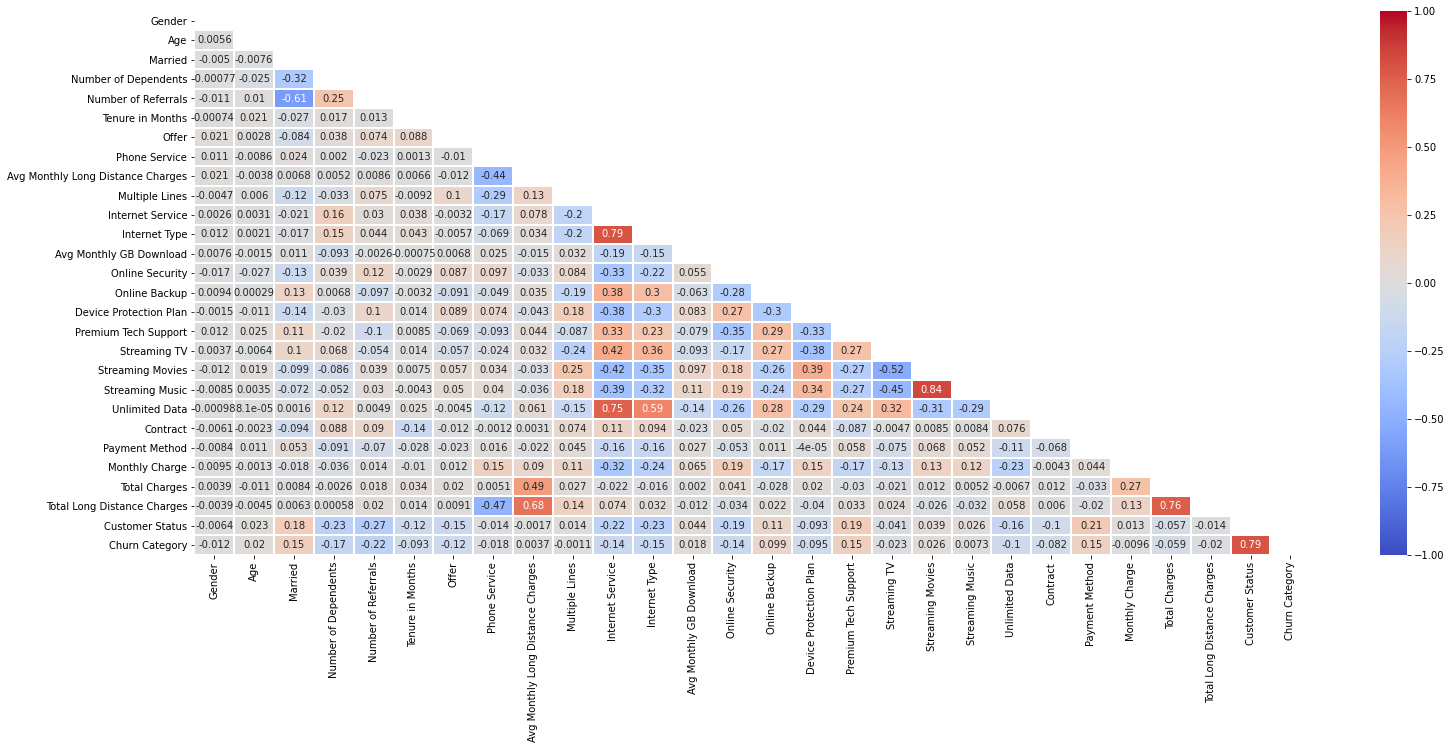

In [21]:

# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

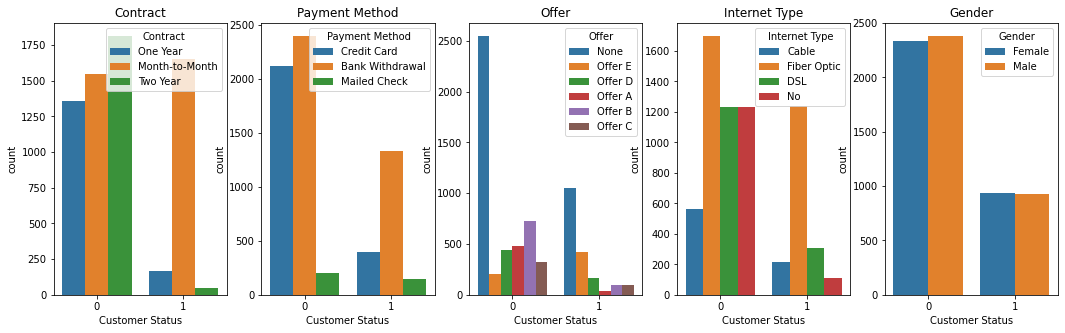

In [22]:
cols = ['Contract',"Payment Method","Offer","Internet Type",'Gender']

plt.figure(figsize=(18,5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = df)
    ax.set_title(f"{col}")


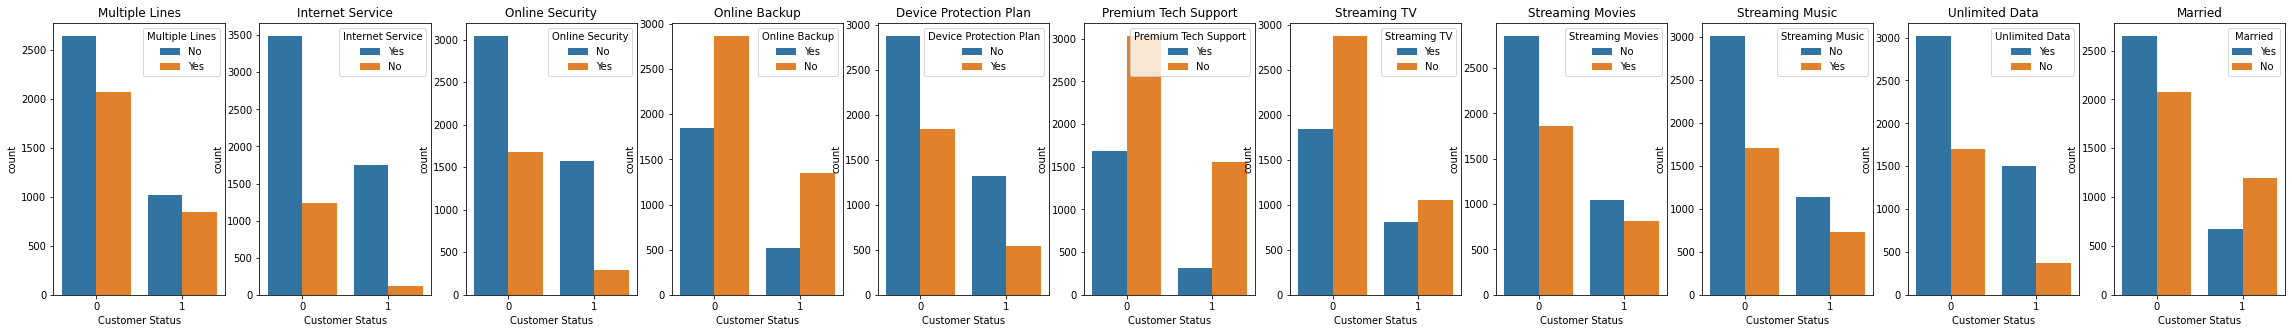

In [23]:
# Correlation between churn and categorical data

cols = ['Multiple Lines', 'Internet Service','Online Security',
                'Online Backup','Device Protection Plan',
                'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Married']


plt.figure(figsize=(40,5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = df)
    ax.set_title(f"{col}")

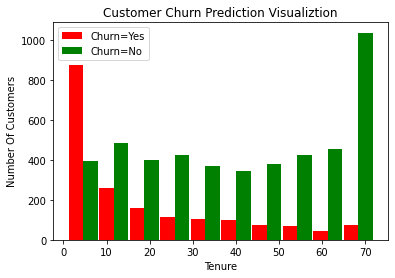

In [24]:
tenurechurn_no = df[df['Customer Status']== 0]['Tenure in Months']
tenurechurn_yes = df[df['Customer Status']== 1]['Tenure in Months']

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenurechurn_yes, tenurechurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

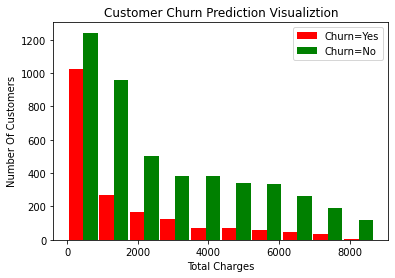

In [25]:
totalchargeschurn_no = df[df['Customer Status']== 0]['Total Charges']
totalchargeschurn_yes = df[df['Customer Status']== 1]['Total Charges']

plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([totalchargeschurn_yes, totalchargeschurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

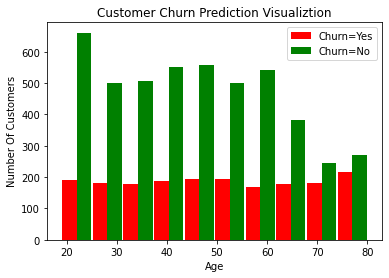

In [26]:
agechurn_no = df[df['Customer Status']== 0]['Age']
agechurn_yes = df[df['Customer Status']== 1]['Age']

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([agechurn_yes, agechurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

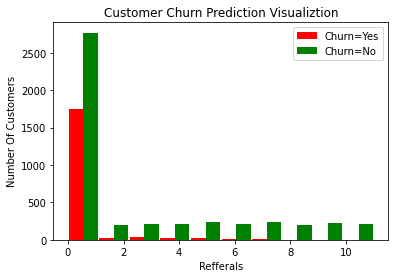

In [27]:
refchurn_no = df[df['Customer Status']== 0]['Number of Referrals']
refchurn_yes = df[df['Customer Status']== 1]['Number of Referrals']

plt.xlabel("Refferals")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([refchurn_yes, refchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

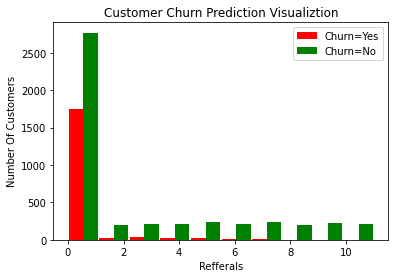

In [28]:
refchurn_no = df[df['Customer Status']== 0]['Number of Referrals']
refchurn_yes = df[df['Customer Status']== 1]['Number of Referrals']

plt.xlabel("Refferals")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([refchurn_yes, refchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

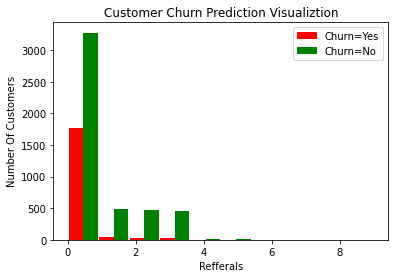

In [29]:
depchurn_no = df[df['Customer Status']== 0]['Number of Dependents']
depchurn_yes = df[df['Customer Status']== 1]['Number of Dependents']

plt.xlabel("Refferals")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([depchurn_yes, depchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

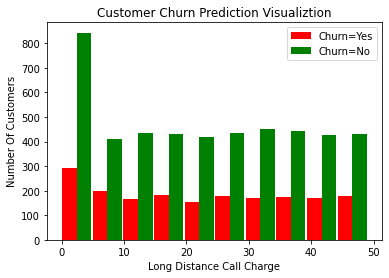

In [30]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].astype(int)
distchurn_no = df[df['Customer Status']== 0]['Avg Monthly Long Distance Charges']
distchurn_yes = df[df['Customer Status']== 1]['Avg Monthly Long Distance Charges']

plt.xlabel("Long Distance Call Charge")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([distchurn_yes, distchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

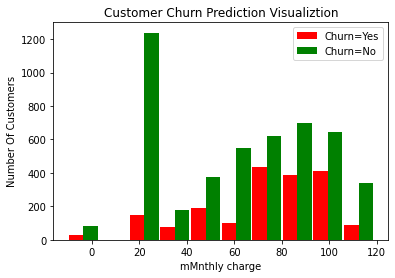

In [31]:
monthchurn_no = df[df['Customer Status']== 0]['Monthly Charge']
monthchurn_yes = df[df['Customer Status']== 1]['Monthly Charge']

plt.xlabel("mMnthly charge")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([monthchurn_yes, monthchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

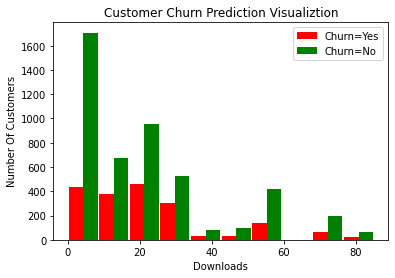

In [32]:
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].astype(int)
mdownchurn_no = df[df['Customer Status']== 0]['Avg Monthly GB Download']
mdownchurn_yes = df[df['Customer Status']== 1]['Avg Monthly GB Download']

plt.xlabel("Downloads")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mdownchurn_yes, mdownchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [33]:
#Supervised Learning is applied when we have a labelled data set i.e., we already our output variable/dependent variable.
#1) Naive Bayes -- best applied to a data set containing multiple features (independent variable) and an output variable which takes two discrete value (Yes/No). Thus, categorical data. 1) Naive Bayes -- best applied to a data set containing multiple features (independent variable) and an output variable which takes two discrete value (Yes/No). Thus, categorical data. 
#2) SVM -- best applied to a data set containing infinite number of features and you need to reduce these features down to a number so that it can be computed. Since it's a classification algorithm so it best works upon categorical data. 
#3) Regression -- Linear Regression is applied to a continuous numerical data set in which the dependent and independent variable exhibits linear relationship. For example, size of the house vs house price. Logistic Regression is a classification algorithm so it is best applied to categorical data. 3) K-Means -- K-Means can applied to many types of data sets. What it does is segmenting data points into clusters. Data points with similar features are clustered together.
#4) Neural Networks -- Neural Networks can be shallow neural networks and deep neural networks and both of these could be applied to supervised or unsupervised problem as it has separate algorithms for both the cases. It is the most powerful and popular class of ML algorithms. It can be used in every problem statement. Main intuition behind it learning from its own error. I do not have much knowledge about neural network so I will not write further more.

In [34]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

Gender: ['Female' 'Male']
Age: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33
 31 60 69 20 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65]
Married: ['Yes' 'No']
Number of Dependents: [0 3 1 2 4 6 5 9 7 8]
Number of Referrals: [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months: [ 9  4 13  3 71 63  7 65 54 72  5 56 34 45  1 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Offer: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes' 'No']
Avg Monthly Long Distance Charges: [42 10 33 27  7 16  9 12 28  0 18  2 31 43 34 35 19 37 38 49 23 30  5 25
 48  6 32 24 36 44 11 20 39  8 40 47 45 14  1 13 41 46 22  3 15 17  4 21
 26 29]
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' 'No']
Avg Monthly GB Download

In [35]:
yesno_col = ['Married','Phone Service','Multiple Lines','Online Security','Online Backup',
                  'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Internet Service']
for col in yesno_col:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
df

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0     Female   37        1                     0                    2   
1       Male   46        0                     0                    0   
2       Male   50        0                     0                    0   
3       Male   78        1                     0                    1   
4     Female   75        1                     0                    3   
...      ...  ...      ...                   ...                  ...   
7037  Female   36        0                     0                    0   
7038  Female   20        0                     0                    0   
7039    Male   40        1                     0                    1   
7041    Male   21        1                     0                    5   
7042    Male   36        1                     0                    1   

      Tenure in Months    Offer  Phone Service  \
0                    9     None              1   
1                    9     None              1   
2                    4  Offer E              1   
3                   13  Offer D              1   
4                    3     None              1   
...                ...      ...            ...   
7037                 4     None              1   
7038                13  Offer D              1   
7039                22  Offer D              1   
7041                67  Offer A              1   
7042                63     None              0   

      Avg Monthly Long Distance Charges  Multiple Lines  ...  \
0                                    42               0  ...   
1                                    10               1  ...   
2                                    33               0  ...   
3                                    27               0  ...   
4                                     7               0  ...   
...                                 ...             ...  ...   
7037                                  2               0  ...   
7038                                 46               0  ...   
7039                                 16               1  ...   
7041                                  2               0  ...   
7042                                  0               0  ...   

      Streaming Movies Streaming Music  Unlimited Data        Contract  \
0                    0               0               1        One Year   
1                    1               1               0  Month-to-Month   
2                    0               0               1  Month-to-Month   
3                    1               0               1  Month-to-Month   
4                    0               0               1  Month-to-Month   
...                ...             ...             ...             ...   
7037                 0               0               0  Month-to-Month   
7038                 0               1               1        One Year   
7039                 1               1               1  Month-to-Month   
7041                 1               1               1        Two Year   
7042                 1               1               1        Two Year   

       Payment Method  Monthly Charge  Total Charges  \
0         Credit Card           65.60         593.30   
1         Credit Card           -4.00         542.40   
2     Bank Withdrawal           73.90         280.85   
3     Bank Withdrawal           98.00        1237.85   
4         Credit Card           83.90         267.40   
...               ...             ...            ...   
7037  Bank Withdrawal           20.95          85.50   
7038      Credit Card           55.15         742.90   
7039  Bank Withdrawal           85.10        1873.70   
7041      Credit Card           67.85        4627.65   
7042  Bank Withdrawal           59.00        3707.60   

      Total Long Distance Charges  Customer Status   Churn Category  
0                          381.51                0        satisfied  
1                           96.21                0       

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
def encode_data(df):
    if df.dtype == "object":
        df = LabelEncoder().fit_transform(df)
    return df

data = df.apply(lambda x: encode_data(x))
data.head()

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0       0   37        1                     0                    2   
1       1   46        0                     0                    0   
2       1   50        0                     0                    0   
3       1   78        1                     0                    1   
4       0   75        1                     0                    3   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges  \
0                 9      0              1                                 42   
1                 9      0              1                                 10   
2                 4      5              1                                 33   
3                13      4              1                                 27   
4                 3      0              1                                  7   

   Multiple Lines  ...  Streaming Movies  Streaming Music  Unlimited Data  \
0               0  ...                 0                0               1   
1               1  ...                 1                1               0   
2               0  ...                 0                0               1   
3               0  ...                 1                0               1   
4               0  ...                 0                0               1   

   Contract  Payment Method  Monthly Charge  Total Charges  \
0         1               1            65.6         593.30   
1         0               1            -4.0         542.40   
2         0               0            73.9         280.85   
3         0               0            98.0        1237.85   
4         0               1            83.9         267.40   

   Total Long Distance Charges  Customer Status  Churn Category  
0                       381.51                0               5  
1                        96.21                0               5  
2                       134.60                1               1  
3                       361.66                1               2  
4                        22.14                1               2  

[5 rows x 28 columns]

In [37]:
#--------------------#
# MULTICOLLINEARITY  #
#--------------------#
#VIF starts at 1, and if the 10 value is exceeded, that will indicate high multicollinearity between the independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

ds_vif = data[['Internet Service','Total Long Distance Charges','Gender','Total Charges','Monthly Charge','Number of Dependents','Multiple Lines','Online Security','Online Backup','Device Protection Plan','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Age','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Married','Tenure in Months', 'Phone Service','Number of Referrals','Offer','Contract','Payment Method','Internet Type']]

vif = calculate_vif(ds_vif)
vif

variables  Variable Inflation Factors
0                    Internet Service                   32.754427
1         Total Long Distance Charges                   10.143155
2                              Gender                    1.998004
3                       Total Charges                   18.005261
4                      Monthly Charge                   38.050920
5                Number of Dependents                    1.534369
6                      Multiple Lines                    2.664274
7                     Online Security                    2.044238
8                       Online Backup                    2.299279
9              Device Protection Plan                    2.415232
10            Avg Monthly GB Download                    4.016159
11  Avg Monthly Long Distance Charges                   10.740375
12                                Age                   13.073162
13               Premium Tech Support                    2.112437
14                       Streaming TV                    3.059054
15                   Streaming Movies                    8.360862
16                    Streaming Music                    6.754650
17                     Unlimited Data                    7.270340
18                            Married                    3.938597
19                   Tenure in Months                   19.555855
20                      Phone Service                   17.417092
21                Number of Referrals                    2.686413
22                              Offer                    1.757286
23                           Contract                    3.922645
24                     Payment Method                    1.800206
25                      Internet Type                   10.242637

In [38]:
cols_to_scale = ['Total Long Distance Charges','Tenure in Months','Monthly Charge','Total Charges','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Age','Number of Referrals','Offer','Contract','Churn Category']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

Gender       Age  Married  Number of Dependents  Number of Referrals  \
0          0  0.295082        1                     0             0.181818   
1          1  0.442623        0                     0             0.000000   
2          1  0.508197        0                     0             0.000000   
3          1  0.967213        1                     0             0.090909   
4          0  0.918033        1                     0             0.272727   
...      ...       ...      ...                   ...                  ...   
7037       0  0.278689        0                     0             0.000000   
7038       0  0.016393        0                     0             0.000000   
7039       1  0.344262        1                     0             0.090909   
7041       1  0.032787        1                     0             0.454545   
7042       1  0.278689        1                     0             0.090909   

      Tenure in Months  Offer  Phone Service  \
0             0.112676    0.0              1   
1             0.112676    0.0              1   
2             0.042254    1.0              1   
3             0.169014    0.8              1   
4             0.028169    0.0              1   
...                ...    ...            ...   
7037          0.042254    0.0              1   
7038          0.169014    0.8              1   
7039          0.295775    0.8              1   
7041          0.929577    0.2              1   
7042          0.873239    0.0              0   

      Avg Monthly Long Distance Charges  Multiple Lines  ...  \
0                              0.857143               0  ...   
1                              0.204082               1  ...   
2                              0.673469               0  ...   
3                              0.551020               0  ...   
4                              0.142857               0  ...   
...                                 ...             ...  ...   
7037                           0.040816               0  ...   
7038                           0.938776               0  ...   
7039                           0.326531               1  ...   
7041                           0.040816               0  ...   
7042                           0.000000               0  ...   

      Streaming Movies  Streaming Music  Unlimited Data  Contract  \
0                    0                0               1       0.5   
1                    1                1               0       0.0   
2                    0                0               1       0.0   
3                    1                0               1       0.0   
4                    0                0               1       0.0   
...                ...              ...             ...       ...   
7037                 0                0               0       0.0   
7038                 0                1               1       0.5   
7039                 1                1               1       0.0   
7041                 1                1               1       1.0   
7042                 1                1               1       1.0   

      Payment Method  Monthly Charge  Total Charges  \
0                  1        0.587184       0.066288   
1                  1        0.046602       0.060415   
2                  0        0.651650       0.030233   
3                  0        0.838835       0.140665   
4                  1        0.729320       0.028681   
...              ...             ...            ...   
7037               0        0.240388       0.007691   
7038               1        0.506019       0.083551   
7039               0        0.738641       0.214039   
7041               1        0.604660       0.531829   
7042               0        0.535922       0.425660   

      Total Long Distance Charges  Customer Status  Churn Category  
0                        0.107024                0             1.0  
1                        0.026989                0             1.0  
2                        0

In [39]:
data.dtypes

Gender                                 int32
Age                                  float64
Married                                int64
Number of Dependents                   int64
Number of Referrals                  float64
Tenure in Months                     float64
Offer                                float64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                          int32
Avg Monthly GB Download              float64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract                             float64
Payment Me

In [40]:
for col in data:
    print(f'{col}: {data[col].unique()}')

Gender: [0 1]
Age: [0.29508197 0.44262295 0.50819672 0.96721311 0.91803279 0.06557377
 0.78688525 0.54098361 0.80327869 0.39344262 0.45901639 0.09836066
 0.63934426 0.21311475 0.32786885 0.98360656 0.1147541  0.18032787
 0.24590164 0.37704918 0.73770492 0.47540984 0.14754098 0.2295082
 0.19672131 0.67213115 0.81967213 0.01639344 0.62295082 0.
 0.31147541 0.26229508 0.86885246 0.52459016 0.7704918  0.68852459
 0.08196721 0.59016393 0.6557377  0.85245902 0.49180328 0.3442623
 0.03278689 0.42622951 0.16393443 0.70491803 0.93442623 0.95081967
 0.8852459  0.36065574 0.60655738 0.57377049 0.04918033 1.
 0.72131148 0.55737705 0.40983607 0.83606557 0.90163934 0.27868852
 0.13114754 0.75409836]
Married: [1 0]
Number of Dependents: [0 3 1 2 4 6 5 9 7 8]
Number of Referrals: [0.18181818 0.         0.09090909 0.27272727 0.72727273 0.81818182
 0.90909091 0.45454545 0.36363636 0.63636364 0.54545455 1.        ]
Tenure in Months: [0.11267606 0.04225352 0.16901408 0.02816901 0.98591549 0.87323944
 0.08

In [41]:
X = data.drop('Customer Status',axis='columns')
y = data['Customer Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(5271, 27)

In [42]:
X_test.shape

(1318, 27)

In [43]:
X_train[:50]

Gender       Age  Married  Number of Dependents  Number of Referrals  \
4681       0  0.016393        0                     0             0.000000   
511        1  0.327869        0                     0             0.000000   
2842       0  0.491803        1                     2             0.545455   
2774       1  0.737705        0                     0             0.000000   
3264       1  0.688525        0                     0             0.000000   
5877       1  0.770492        0                     0             0.000000   
1371       1  0.098361        1                     0             0.090909   
3403       0  0.147541        1                     3             0.272727   
4925       1  0.967213        0                     0             0.000000   
4590       1  0.622951        1                     1             0.545455   
6492       1  0.147541        1                     0             0.090909   
144        0  0.704918        1                     0             0.363636   
3798       1  0.049180        1                     1             0.727273   
5002       0  0.540984        0                     0             0.000000   
4325       1  0.557377        0                     0             0.000000   
3993       0  0.934426        0                     0             0.000000   
6568       1  0.737705        0                     3             0.000000   
2810       0  0.327869        1                     3             0.181818   
3791       1  0.786885        1                     0             0.000000   
6963       0  0.721311        1                     0             0.272727   
146        0  0.295082        0                     0             0.000000   
2229       0  0.377049        1                     1             0.636364   
2498       1  0.672131        0                     0             0.000000   
5080       1  0.721311        0                     0             0.000000   
2092       1  0.819672        1                     1             0.090909   
6766       1  0.819672        1                     0             0.090909   
2300       0  0.196721        0                     0             0.000000   
590        1  0.688525        1                     0             0.090909   
4359       1  0.245902        0                     0             0.000000   
392        0  0.032787        1                     1             0.636364   
3452       0  0.163934        0                     0             0.000000   
2885       0  0.098361        1                     1             0.636364   
5034       1  0.721311        1                     0             0.636364   
1929       0  0.377049        0                     0             0.000000   
889        1  0.344262        1                     3             0.818182   
3935       1  0.819672        0                     0             0.000000   
4997       0  0.950820        0                     0             0.000000   
6746       1  0.163934        0                     0             0.000000   
1222       1  0.196721        1                     1             0.363636   
4648       1  0.409836        1                     0             0.090909   
2870       1  0.032787        1                     0             0.090909   
5047       1  0.081967        1                     0             0.454545   
3491       0  0.262295        1                     3             0.090909   
3322       1  0.655738        1                     0             0.636364   
4005       1  0.803279        1                     0             0.090909   
6897       1  0.065574        0                     0             0.000000   
2362       0  0.131148        1                     1             0.545455   
6717       0  0.213115        0                     0             0.000000   
2868       1  0.557377        1                     1             0.727273   
921        1  0.098361        1                     2             0.181818   

      Tenure in Months  Off